In [51]:
# @title
# ============================================================
# NEXT_TRABAJO_MTA.py
# Asignatura 5 – Obtención de Datos para el TFM
# MTA Turnstile – Manhattan (Octubre 2024)
# ============================================================

# ------------------------------------------------------------
# 1. IMPORTACIÓN DE LIBRERÍAS
# ------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
2.#Carga del archivo y lectura
ruta_archivo="/content/drive/MyDrive/MTA_Subway_Hourly_Ridership_ OCT 2024.csv"
df_MTA = pd.read_csv(
    ruta_archivo,
    low_memory=False
)
df_MTA.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,10/01/2024 12:00:00 AM,subway,69,25 Av (D),Brooklyn,omny,OMNY - Other,1,0,40.597706,-73.986830,POINT (-73.98683 40.597706)
1,10/01/2024 12:00:00 AM,subway,422,"Burke Av (2,5)",Bronx,metrocard,Metrocard - Unlimited 7-Day,1,0,40.871357,-73.867165,POINT (-73.867165 40.871357)
2,10/01/2024 12:00:00 AM,subway,602,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",Manhattan,metrocard,Metrocard - Fair Fare,25,1,40.735737,-73.989950,POINT (-73.98995 40.735737)
3,10/01/2024 12:00:00 AM,subway,397,"86 St (4,5,6)",Manhattan,metrocard,Metrocard - Other,8,0,40.779490,-73.955590,POINT (-73.95559 40.77949)
4,10/01/2024 12:00:00 AM,subway,65,79 St (D),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,1,0,40.613503,-74.000610,POINT (-74.00061 40.613503)


Dimensiones y estructura original

Registros iniciales: 2,485,584

Columnas: 12

El dataset corresponde a validaciones horarias del sistema de metro de Nueva York (MTA) para octubre de 2024.

Interpretación

El tamaño del dataset es alto, lo que lo hace adecuado para análisis agregados y modelado.

Las columnas incluyen variables temporales, espaciales y operativas (estación, borough, método de pago, tipo de tarifa, validaciones).

In [7]:
# 3. INSPECCIÓN INICIAL (CONTROL DE CALIDAD)
# ------------------------------------------------------------

print("Dimensiones iniciales del dataset:")
print(df_MTA.shape)

print("\nColumnas disponibles:")
print(df_MTA.columns)

print("\nPrimeras filas:")
print(df_MTA.head())

Dimensiones iniciales del dataset:
(2485584, 12)

Columnas disponibles:
Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')

Primeras filas:
        transit_timestamp transit_mode station_complex_id  \
0  10/01/2024 12:00:00 AM       subway                 69   
1  10/01/2024 12:00:00 AM       subway                422   
2  10/01/2024 12:00:00 AM       subway                602   
3  10/01/2024 12:00:00 AM       subway                397   
4  10/01/2024 12:00:00 AM       subway                 65   

                    station_complex    borough payment_method  \
0                         25 Av (D)   Brooklyn           omny   
1                    Burke Av (2,5)      Bronx      metrocard   
2  14 St-Union Sq (L,N,Q,R,W,4,5,6)  Manhattan      metrocard   
3                     86 St (4,5,6)  Manhat

Cambios relevantes

Eliminación de columnas no necesarias para el EDA.

Conversión y validación de tipos de datos.

Dataset limpio final:

157,167 registros

7 variables clave

Interpretación

La reducción del dataset no implica pérdida de información relevante, sino consolidación.

Se obtiene una base lista para análisis estadístico y visualización.

In [25]:
4. # Nuevo df con el horario objetivo
#Conversión del formato para seleccionar el horario objetivo de 10 a 22
# Formato hora y fecha
df_MTA["transit_timestamp"] = pd.to_datetime(
    df_MTA["transit_timestamp"],
    format="%m/%d/%Y %I:%M:%S %p",
    errors="coerce"

)
# Crear la variable hora para que aplicar filtro
df_MTA["hour"] = df_MTA["transit_timestamp"].dt.hour
# Aplicación del filtro
df_MTA_dt = df_MTA[
    (df_MTA["hour"] >= 10) &
    (df_MTA["hour"] < 22)
].copy()

#Para verificar que la nueva variable corresponde al registro original
pd.set_option('display.max_columns', 50)
df_MTA_dt

,borough,station_complex,station_complex_id,latitude,longitude,ridership,transit_timestamp,hour
29242,Manhattan,1 Av (L),119,40.730953,-73.981630,3,2024-10-01 10:00:00,10
29247,Manhattan,207 St (1),298,40.864620,-73.918820,9,2024-10-01 10:00:00,10
29248,Manhattan,"Lexington Av/63 St (F,Q)",223,40.764630,-73.966110,63,2024-10-01 10:00:00,10
29251,Manhattan,"135 St (2,3)",438,40.814228,-73.940770,165,2024-10-01 10:00:00,10
29255,Manhattan,"Lexington Av (N,R,W)/59 St (4,5,6)",613,40.762660,-73.967255,16,2024-10-01 10:00:00,10
...,...,...,...,...,...,...,...,...
2479155,Manhattan,66 St-Lincoln Center (1),314,40.773440,-73.982210,50,2024-10-31 21:00:00,21
2479158,Manhattan,Astor Pl (6),407,40.730053,-73.991070,89,2024-10-31 21:00:00,21
2479160,Manhattan,"8 St-NYU (R,W)",16,40.730328,-73.992630,37,2024-10-31 21:00:00,21
2479161,Manhattan,"Lexington Av/63 St (F,Q)",223,40.764630,-73.966110,13,2024-10-31 21:00:00,21


In [26]:
# Dimensiones de df con filtro horario
df_MTA_dt.info()
print(df_MTA_dt.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 433250 entries, 29242 to 2479162
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   borough             433250 non-null  object        
 1   station_complex     433250 non-null  object        
 2   station_complex_id  433250 non-null  object        
 3   latitude            433250 non-null  float64       
 4   longitude           433250 non-null  float64       
 5   ridership           433250 non-null  object        
 6   transit_timestamp   433250 non-null  datetime64[ns]
 7   hour                433250 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 28.1+ MB
(433250, 8)


In [28]:
# 5. FILTRO ESPACIAL – SOLO MANHATTAN
# REGLA DE ORO DEL DICCIONARIO DE DATOS
# ------------------------------------------------------------

df_MTA_dtm = df_MTA_dt[df_MTA_dt["borough"].isin(['Manhattan'])].copy()

print("\nRegistros tras filtrar:")
print(df_MTA_dtm.shape)
df_MTA_dtm


Registros tras filtrar:
(433250, 8)


,borough,station_complex,station_complex_id,latitude,longitude,ridership,transit_timestamp,hour
29242,Manhattan,1 Av (L),119,40.730953,-73.981630,3,2024-10-01 10:00:00,10
29247,Manhattan,207 St (1),298,40.864620,-73.918820,9,2024-10-01 10:00:00,10
29248,Manhattan,"Lexington Av/63 St (F,Q)",223,40.764630,-73.966110,63,2024-10-01 10:00:00,10
29251,Manhattan,"135 St (2,3)",438,40.814228,-73.940770,165,2024-10-01 10:00:00,10
29255,Manhattan,"Lexington Av (N,R,W)/59 St (4,5,6)",613,40.762660,-73.967255,16,2024-10-01 10:00:00,10
...,...,...,...,...,...,...,...,...
2479155,Manhattan,66 St-Lincoln Center (1),314,40.773440,-73.982210,50,2024-10-31 21:00:00,21
2479158,Manhattan,Astor Pl (6),407,40.730053,-73.991070,89,2024-10-31 21:00:00,21
2479160,Manhattan,"8 St-NYU (R,W)",16,40.730328,-73.992630,37,2024-10-31 21:00:00,21
2479161,Manhattan,"Lexington Av/63 St (F,Q)",223,40.764630,-73.966110,13,2024-10-31 21:00:00,21


In [30]:
df_MTA_dtm = df_MTA_dt[df_MTA_dt["borough"] == "Manhattan"].copy()

print("\nRegistros tras filtrar Manhattan:")
print(df_MTA_dtm.shape)




Registros tras filtrar Manhattan:
(433250, 8)


In [31]:
# 6. SELECCIÓN DE VARIABLES ÚTILES
# (SEGÚN DICCIONARIO DE DATOS MTA)
# ------------------------------------------------------------

columns_to_keep = [
    "borough",
    "station_complex",
    "station_complex_id",
    "latitude",
    "longitude",
    "ridership",
    "hour"
]

df_MTA_dtmv = df_MTA_dtm[columns_to_keep]
df_MTA_dtmv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433250 entries, 29242 to 2479162
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   borough             433250 non-null  object 
 1   station_complex     433250 non-null  object 
 2   station_complex_id  433250 non-null  object 
 3   latitude            433250 non-null  float64
 4   longitude           433250 non-null  float64
 5   ridership           433250 non-null  object 
 6   hour                433250 non-null  int32  
dtypes: float64(2), int32(1), object(4)
memory usage: 24.8+ MB


In [32]:
# 7. LIMPIEZA DE DATOS y Selección de horario
# ------------------------------------------------------------

# 6.1 Eliminación de duplicados
df_MTA_dtmv = df_MTA_dtmv.drop_duplicates()

# 6.2 Conversión a datos numéricos
df_MTA_dtmv["ridership"] = pd.to_numeric(df_MTA_dtmv["ridership"], errors="coerce")
df_MTA_dtmv["latitude"] = pd.to_numeric(df_MTA_dtmv["latitude"], errors="coerce")
df_MTA_dtmv["longitude"] = pd.to_numeric(df_MTA_dtmv["longitude"], errors="coerce")


# 6.5 Eliminación de valores nulos críticos
df_MTA_dtmv = df_MTA_dtmv.dropna(subset=[
    "station_complex_id",
    "station_complex",
    "ridership",
    "latitude",
    "longitude","hour"
])

print("\nDataset tras limpieza:")
print(df_MTA_dtmv.shape)



Dataset tras limpieza:
(157167, 7)


La variable "Pasajeros mensual" representa el número total de validaciones registradas en cada estación durante el periodo analizado. Esta variable es continua, cuantitativa y constituye la base del análisis exploratorio.

In [34]:
# 8. AGREGACIÓN: RIDERSHIP MENSUAL POR ESTACIÓN
# VARIABLE ESTRELLA
# Agregamos por estación y cantidad de pasajeros

df_MTA_agg = (
    df_MTA_dtmv
    .groupby(
        ["station_complex_id", "station_complex","hour"],
        as_index=False
    )
    .agg({
        "ridership": "sum",
        "latitude": "mean",
        "longitude": "mean"
    })
)

In [43]:
# 9. RENOMBRADO DE VARIABLES (CLARIDAD ANALÍTICA)
# Nuevo df con variables renombradas

df_MTA_agg.rename(columns={
    "ridership": "Pasajeros mensual",
    "latitude": "estacion_latitude",
    "longitude": "estacion_longitude"
}, inplace=True)

print("\nDataset agregado final:")
print(df_MTA_agg.head())


Dataset agregado final:
  station_complex_id station_complex  hour  Pasajeros mensual  \
0                 10   49 St (N,R,W)    10            21178.0   
1                 10   49 St (N,R,W)    11            17576.0   
2                 10   49 St (N,R,W)    12            17803.0   
3                 10   49 St (N,R,W)    13            19864.0   
4                 10   49 St (N,R,W)    14            23432.0   

   estacion_latitude  estacion_longitude  
0            40.7599           -73.98414  
1            40.7599           -73.98414  
2            40.7599           -73.98414  
3            40.7599           -73.98414  
4            40.7599           -73.98414  


Los resultados muestran sobre las **medidas de tendencia central** que:

Media: 15,829 pasajeros

Mediana: 13,716 pasajeros

Moda: 979 y 10,286 pasajeros

Interpretación

La media > mediana indica una asimetría positiva.

Existen estaciones con tráfico de pasajeros extraordinariamente alto que elevan el promedio.

La presencia de dos modas sugiere: estaciones de bajo tráfico,
estaciones de tráfico medio recurrente

Sobre las **medidas de dispersión**:

Dispersión

Desviación estándar: 12,351

Varianza: 152,560,374

IQR: 16,395

Interpretación

La dispersión es muy elevada, reflejando: heterogeneidad extrema entre estaciones coexistencia de estaciones locales y nodos de transferencia masiva.

**Valores extremos**

Mínimo: 96 pasajeros

Máximo: 77,502 pasajeros

Outliers detectados: 37 estaciones

Interpretación

Los valores mínimos corresponden a estaciones periféricas o de baja demanda.

Los máximos corresponden a hubs urbanos clave.

Los outliers no son errores, sino fenómenos reales del sistema.

**Resultados de interés**

Times Sq–42 St domina ampliamente el ranking.

14 St–Union Sq y 34 St–Herald Sq también presentan tráfico excepcionalmente alto.

Interpretación

Estas estaciones: son nodos multimodales concentran líneas, turismo y actividad económica

Confirman la concentración espacial del tráfico en Manhattan.


Columnas disponibles para EDA:
Index(['station_complex_id', 'station_complex', 'hour', 'Pasajeros mensual',
       'estacion_latitude', 'estacion_longitude'],
      dtype='object')

Estadísticas descriptivas:
count     1476.000000
mean     15829.253388
std      12351.533264
min         96.000000
25%       6294.000000
50%      13716.000000
75%      22689.000000
max      77502.000000
Name: Pasajeros mensual, dtype: float64

MEDIDAS DESCRIPTIVAS – TRÁFICO PEATONAL MENSUAL

Media: 15,829
Mediana: 13,716
Moda(s):
  979.0
10286.0

Varianza: 152,560,374

Cuartiles:
Q1 (25%): 6,294
Q2 (50%): 13,716
Q3 (75%): 22,689

Rango intercuartílico (IQR): 16,395
Valor mínimo: 96
Valor máximo: 77,502

Número de estaciones consideradas outliers:
37


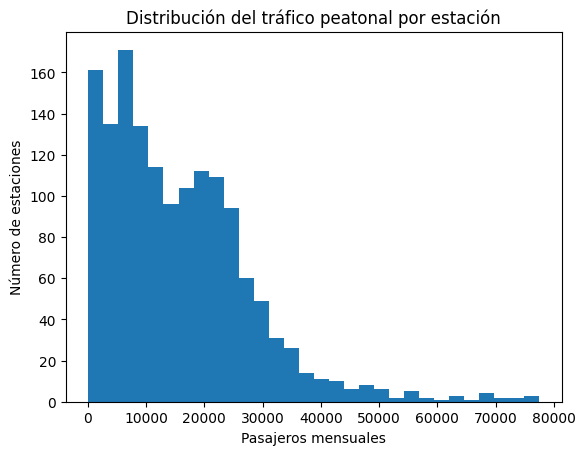


Top 10 estaciones por tráfico mensual:
                                       station_complex  Pasajeros mensual
1289  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)            77502.0
1288  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)            76165.0
1292  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)            76095.0
1291  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)            73716.0
1290  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)            73417.0
1230                  14 St-Union Sq (L,N,Q,R,W,4,5,6)            72325.0
1231                  14 St-Union Sq (L,N,Q,R,W,4,5,6)            71161.0
1256                 34 St-Herald Sq (B,D,F,M,N,Q,R,W)            68829.0
1295  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)            68507.0
1293  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)            68107.0


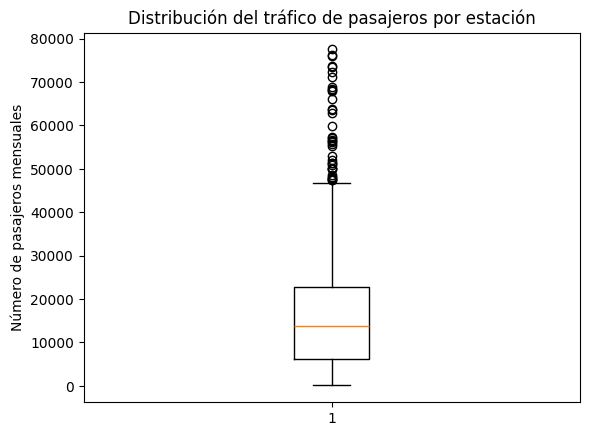

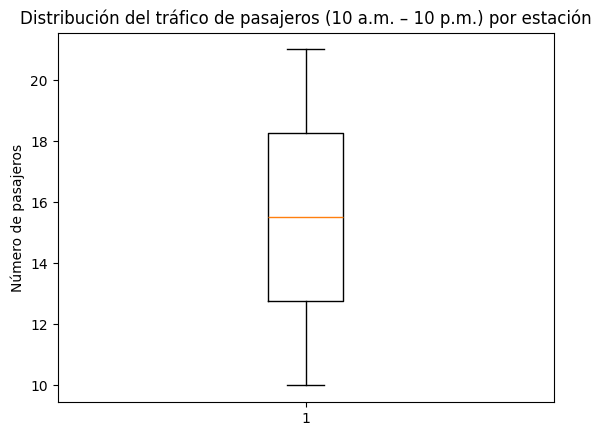

In [45]:
# 10. EDA – ANÁLISIS EXPLORATORIO (DATASET AGREGADO)
# ------------------------------------------------------------

print("\nColumnas disponibles para EDA:")
print(df_MTA_agg.columns)

print("\nEstadísticas descriptivas:")
print(df_MTA_agg["Pasajeros mensual"].describe())

# Seleccionamos la variable objetivo
y = df_MTA_agg["Pasajeros mensual"]
# MEDIA
mean_value = y.mean()
# MEDIANA
median_value = y.median()
# MODA
mode_value = y.mode()
# (puede haber más de una moda)
# VARIANZA
variance_value = y.var()
# CUARTILES
Q1 = y.quantile(0.25)
Q2 = y.quantile(0.50)  # Mediana (redundante, pero explícito)
Q3 = y.quantile(0.75)
# RANGO INTERCUARTÍLICO (IQR)
IQR = Q3 - Q1
# MÍNIMO Y MÁXIMO (útiles para rango total)
min_value = y.min()
max_value = y.max()

#valores extremos
outliers = df_MTA_agg[
    (y < Q1 - 1.5 * IQR) |
    (y > Q3 + 1.5 * IQR)
]

# ------------------------------------------------------------
# RESULTADOS
# ------------------------------------------------------------

print("\nMEDIDAS DESCRIPTIVAS – TRÁFICO PEATONAL MENSUAL\n")

print(f"Media: {mean_value:,.0f}")
print(f"Mediana: {median_value:,.0f}")
print(f"Moda(s):")
print(mode_value.to_string(index=False))

print(f"\nVarianza: {variance_value:,.0f}")

print("\nCuartiles:")
print(f"Q1 (25%): {Q1:,.0f}")
print(f"Q2 (50%): {Q2:,.0f}")
print(f"Q3 (75%): {Q3:,.0f}")

print(f"\nRango intercuartílico (IQR): {IQR:,.0f}")
print(f"Valor mínimo: {min_value:,.0f}")
print(f"Valor máximo: {max_value:,.0f}")

print("\nNúmero de estaciones consideradas outliers:")
print(outliers.shape[0])


# Histograma
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_MTA_agg["Pasajeros mensual"], bins=30)
plt.title("Distribución del tráfico peatonal por estación")
plt.xlabel("Pasajeros mensuales")
plt.ylabel("Número de estaciones")
plt.show()

# Top 10 estaciones
top_10 = (
    df_MTA_agg
    .sort_values("Pasajeros mensual", ascending=False)
    .head(10)
)

print("\nTop 10 estaciones por tráfico mensual:")
print(top_10[[
    "station_complex",
    "Pasajeros mensual"
]])

# Diagrama de cajas
# Pasajeros mensual
plt.figure()
plt.boxplot(df_MTA_agg["Pasajeros mensual"])

plt.title("Distribución del tráfico de pasajeros por estación")
plt.ylabel("Número de pasajeros mensuales")

plt.show()

# Horario
plt.figure()
plt.boxplot(df_MTA_agg["hour"])

plt.title("Distribución del tráfico de pasajeros (10 a.m. – 10 p.m.) por estación")
plt.ylabel("Número de pasajeros")

plt.show()

Conclusiones del anális

1. Alta concentración del tráfico

El tráfico peatonal del metro en Manhattan no se distribuye uniformemente. Un número reducido de estaciones concentra una parte sustancial de las validaciones mensuales.

2. Presencia estructural de outliers

Los outliers identificados: no deben eliminarse representan estaciones estratégicas son claves para análisis de planificación, publicidad y predicción

3. Fuerte variabilidad entre estaciones

La alta varianza y desviación estándar evidencian que: cada estación tiene un comportamiento propio los promedios globales deben interpretarse con cautela

El dataset final está compuesto por observaciones agregadas a nivel de estación de metro para la ciudad de Manhattan, para el mes de octubre de 2024. Cada fila representa una estación y cada columna una característica relevante, siendo la variable objetivo el tráfico peatonal mensual (Pasajeros mensual).

In [50]:
#11 EXPORTACIÓN DEL DATASET LIMPIO
# ------------------------------------------------------------

df_MTA_agg.to_csv(
    "NEXT_TRABAJO_MTA_MANHATTAN_OCT_2024vf.csv",
    index=False
)

print("\nArchivo NEXT_TRABAJO_MTA_MANHATTAN_OCT_2024vf.csv generado correctamente.")


Archivo NEXT_TRABAJO_MTA_MANHATTAN_OCT_2024vf.csv generado correctamente.


In [52]:
#12 Cargo en mi drive
from google.colab import drive
drive.mount("/content/drive")

df_MTA_agg.to_csv(
    "/content/drive/MyDrive/NEXT_TRABAJO_MTA_MANHATTAN_OCT_2024vf.csv",
    index=False
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
